<a href="https://colab.research.google.com/github/aartivjadhav/machine_learning/blob/main/Housing_Project_DT_RF_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
os.listdir('/root/')
os.mkdir('/root/.kaggle')

In [ ]:
os.listdir('/root/')
!mv kaggle.json /root/.kaggle
os.listdir('/root/.kaggle')

['kaggle.json']

In [ ]:
import kaggle

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 77.6MB/s]


In [ ]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.shape

(1460, 81)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
num_data = data.select_dtypes(exclude='object')
num_data.drop('Id',axis=1,inplace=True)

In [ ]:
cat_data = data.select_dtypes(include='object')

In [ ]:
num_data.isna().sum()[num_data.isna().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

<Axes: >

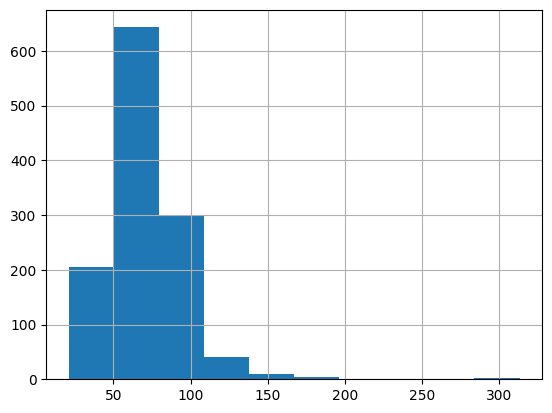

In [ ]:
num_data['LotFrontage'].hist()

<Axes: >

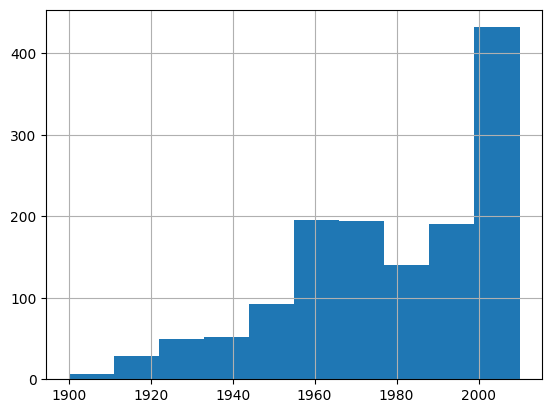

In [ ]:
num_data['GarageYrBlt'].hist()

In [ ]:
# replacing the null values in LotFrontage, GarageYrBlt and MasVnrArea

num_data['LotFrontage'].mean()
# num_data['LotFrontage'].head(10)
# num_data['LotFrontage'].fillna(num_data['LotFrontage'].mode()[0],inplace=True)

70.04995836802665

In [ ]:
num_data['LotFrontage'].fillna(num_data['LotFrontage'].mean(),inplace=True)

In [ ]:
num_data['LotFrontage'].head(10)

0    65.000000
1    80.000000
2    68.000000
3    60.000000
4    84.000000
5    85.000000
6    75.000000
7    70.049958
8    51.000000
9    50.000000
Name: LotFrontage, dtype: float64

In [ ]:
num_data['MasVnrArea'].fillna(num_data['MasVnrArea'].mean(),inplace=True)
num_data['GarageYrBlt'].fillna(num_data['GarageYrBlt'].mean(),inplace=True)

In [ ]:
num_data.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [ ]:
col_list = cat_data.isna().sum()[cat_data.isna().sum()>0]
col_list.index

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [ ]:
# replacing null values with mode in categorical data
for i in col_list.index:
  cat_data[i].fillna(cat_data[i].mode()[0],inplace=True)

In [ ]:
cat_data.isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

<Axes: >

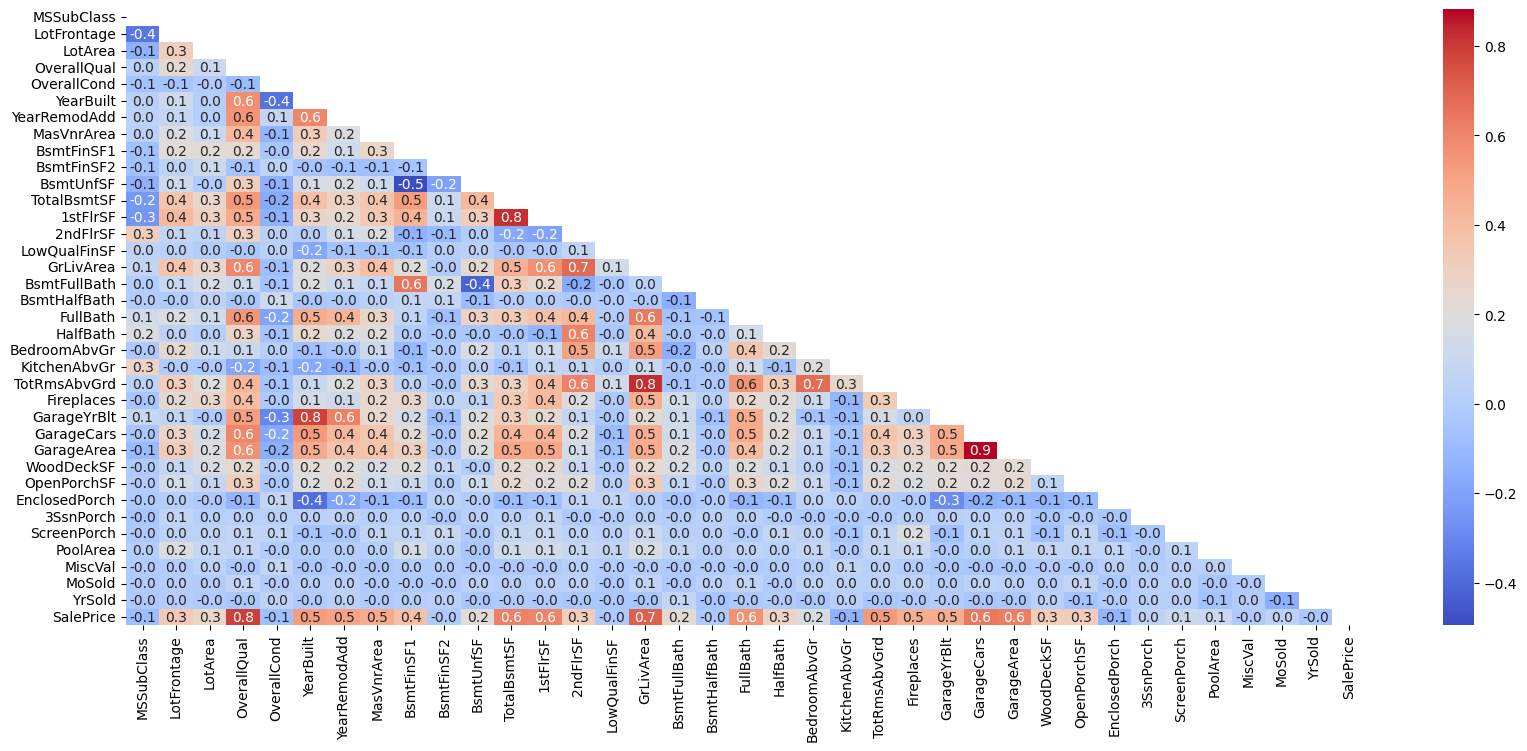

In [ ]:
plt.figure(figsize=(20,8))
mask = np.triu(np.ones_like(num_data.corr()))
sns.heatmap(num_data.corr(),annot=True,cmap='coolwarm',fmt='.1f',mask=mask)

In [ ]:
num_col = num_data.corr()['SalePrice'][round(num_data.corr()['SalePrice'],1)!=0].index
num_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'SalePrice'],
      dtype='object')

In [ ]:
data1 = num_data[num_col]
data1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,...,0,2003.0,2,548,0,61,0,0,0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,...,1,1976.0,2,460,298,0,0,0,0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,...,1,2001.0,2,608,0,42,0,0,0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,...,1,1998.0,3,642,0,35,272,0,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,...,1,2000.0,3,836,192,84,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,953,...,1,1999.0,2,460,0,40,0,0,0,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,589,...,2,1978.0,2,500,349,0,0,0,0,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,877,...,2,1941.0,1,252,0,60,0,0,0,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,0,...,0,1950.0,1,240,366,0,112,0,0,142125


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [ ]:
x = data1.drop('SalePrice',axis=1)
y = data1['SalePrice']
print(x.shape,y.shape)

(1460, 29) (1460,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,train_size=0.8)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1168, 29) (292, 29) (1168,) (292,)


In [ ]:
# regressor only for numerical values
dtr = DecisionTreeRegressor(random_state=0)

In [ ]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = dtr.predict(x_test)

In [ ]:
from sklearn.metrics import *

In [ ]:
print('MSE : ',mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE : ',mean_absolute_error(y_test,y_pred))
print('R2 score : ',r2_score(y_test,y_pred))

MSE :  1878633723.8253424
RMSE :  43343.20850866191
MAE :  27361.859589041094
R2 score :  0.727964879976015


In [ ]:
# regressor for numerical and categorical values
# label encoding for categorical values
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# cate_encode[i] = [encoder.fit_transform(cat_data[i]) for i in cat_data]
for i in cat_data:
  cat_data[i] = encoder.fit_transform(cat_data[i])
# cat_data

In [ ]:
cat_data.isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
df_list = [data1,cat_data]
data2 = pd.concat(df_list,axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  BsmtFullBath   1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

In [ ]:
data2.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
                ..
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
Length: 73, dtype: int64

In [ ]:
x = data2.drop('SalePrice',axis=1)
y = data2['SalePrice']
# print(x.head(),y.head())
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,train_size=0.8,)
# regressor for numerical and categorical values
dtr_num_cat = DecisionTreeRegressor(random_state=0)
dtr_num_cat.fit(x_train,y_train)
y_pred = dtr_num_cat.predict(x_test)
print('MSE : ',mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE : ',mean_absolute_error(y_test,y_pred))
print('R2 score : ',r2_score(y_test,y_pred))

MSE :  2369674805.787671
RMSE :  48679.30572417474
MAE :  27732.753424657534
R2 score :  0.656859790157693


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=45,max_depth=8,random_state=0)

In [ ]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, n_estimators=45, random_state=0)

In [ ]:
y_pred = rfr.predict(x_test)

In [ ]:
print('MSE : ',mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE : ',mean_absolute_error(y_test,y_pred))
print('R2 score : ',r2_score(y_test,y_pred))

MSE :  947187913.5868689
RMSE :  30776.41814095443
MAE :  17107.012551914115
R2 score :  0.8628426741785524


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb = XGBRegressor()


In [ ]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(x_test)

In [ ]:
print('MSE : ',mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE : ',mean_absolute_error(y_test,y_pred))
print('R2 score : ',r2_score(y_test,y_pred))

MSE :  1148821206.0504367
RMSE :  33894.26509087395
MAE :  17882.127608625855
R2 score :  0.8336452120971907
